# PowerPulse: Household Energy Usage Forecast

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

This dataset contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

To predict:- **Global Active Power**.



### Importing the required libraries for reading and visualizing the csv file

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df=pd.read_csv(r'D:\GuviProject3\household_power_consumption.txt',sep=';',low_memory=False)

### Getting info about the dataset

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### We can't analyse this dataset using **object string Dtype**. So, let us convert it to **numeric Dtype** form using pandas

In [63]:
df['Global_active_power']=pd.to_numeric(df['Global_active_power'],errors='coerce')
df['Global_reactive_power']=pd.to_numeric(df['Global_reactive_power'],errors='coerce')
df['Voltage']=pd.to_numeric(df['Voltage'],errors='coerce')
df['Global_intensity']=pd.to_numeric(df['Global_intensity'],errors='coerce')
df['Sub_metering_1']=pd.to_numeric(df['Sub_metering_1'],errors='coerce')
df['Sub_metering_2']=pd.to_numeric(df['Sub_metering_2'],errors='coerce')
df['Sub_metering_3']=pd.to_numeric(df['Sub_metering_3'],errors='coerce')

### Now, let us again check the Dtype to confirm it's converted

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [65]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [66]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Check for missing values

In [67]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

### Let's fill the Null values of each columns with its average value

In [68]:
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)

### Again check for null values are converted to mean values

In [69]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Check for the dataset contains duplicate values in it

In [70]:
sum(df.duplicated())

0

# Outlier Detection and Correction (Fact based only **Sceaux powerpulse** reference from CHATGPT)
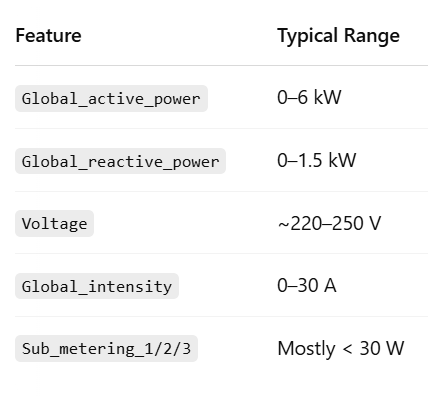

### Global_active_power (0-6 kW)
#### Let us check for the outliers of **Global active power**

In [71]:
df[(df['Global_active_power']<0)|(df['Global_active_power']>6)].count()

Date                     5467
Time                     5467
Global_active_power      5467
Global_reactive_power    5467
Voltage                  5467
Global_intensity         5467
Sub_metering_1           5467
Sub_metering_2           5467
Sub_metering_3           5467
dtype: int64

#### Now we trim out the outlier values of **Global active power**

In [72]:
df['Global_active_power']=df['Global_active_power'].where((df['Global_active_power']>=0)&(df['Global_active_power']<=6))

#### Let us again check for outlier values are properly removed

In [73]:
df[(df['Global_active_power']<0)|(df['Global_active_power']>6)].count()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Global_reactive_power (0-1.5 kW)
#### Let us check for the outlier values of **Global reactive power**

In [74]:
df[(df['Global_reactive_power']<0)|(df['Global_reactive_power']>1.5)].count()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Voltage (~220-250 V)
#### Let us check for any outlier values exist in **Voltage**

In [75]:
df[(df['Voltage']<220)|(df['Voltage']>250)].count()

Date                     4010
Time                     4010
Global_active_power      4010
Global_reactive_power    4010
Voltage                  4010
Global_intensity         4010
Sub_metering_1           4010
Sub_metering_2           4010
Sub_metering_3           4010
dtype: int64

#### Now we trim out the outlier values of **Voltage**

In [76]:
df['Voltage']=df['Voltage'].where((df['Voltage']>=220)&(df['Voltage']<=250))

#### Let us again check for outlier values are properly removed

In [77]:
df[(df['Voltage']<220)|(df['Voltage']>250)].count()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Global_intensity - (0 to 30 amps)
#### Let us check for any outlier values exist in **Global intensity**

In [78]:
df[(df['Global_intensity']<0)|(df['Global_intensity']>30)].count()

Date                     1565
Time                     1565
Global_active_power         0
Global_reactive_power    1565
Voltage                  1565
Global_intensity         1565
Sub_metering_1           1565
Sub_metering_2           1565
Sub_metering_3           1565
dtype: int64

#### Now we trim out the outlier values of **Global intensity**

In [79]:
df['Global_intensity']=df['Global_intensity'].where((df['Global_intensity']>=0)&(df['Global_intensity']<=30))

#### Let us again check for outlier values are properly removed

In [80]:
df[(df['Global_intensity']<0)|(df['Global_intensity']>30)].count()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Sub_metering_1 - (less than 30 Watts)
#### Let us check for any outlier values exist in **Sub metering 1**

In [81]:
df[(df['Sub_metering_1']>30)].count()

Date                     50889
Time                     50889
Global_active_power      47832
Global_reactive_power    50889
Voltage                  50889
Global_intensity         49848
Sub_metering_1           50889
Sub_metering_2           50889
Sub_metering_3           50889
dtype: int64

#### Now we trim out the outlier values of **Sub metering 1**

In [82]:
df['Sub_metering_1']=df['Sub_metering_1'].where((df['Sub_metering_1']<=30))

#### Let us again check for outlier values are properly removed

In [83]:
df[(df['Sub_metering_1']>30)].count()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Sub_metering_2 - (less than 30 Watts)
#### Let us check for any outlier values exist in **Sub metering 2**

In [84]:
df[df['Sub_metering_2']>30].count()

Date                     33630
Time                     33630
Global_active_power      30162
Global_reactive_power    33630
Voltage                  33627
Global_intensity         32493
Sub_metering_1           31053
Sub_metering_2           33630
Sub_metering_3           33630
dtype: int64

#### Now we trim out the outlier values of **Sub metering 2**

In [85]:
df['Sub_metering_2']=df['Sub_metering_2'].where((df['Sub_metering_2']<=30))

#### Let us again check for outlier values are properly removed

In [86]:
df[df['Sub_metering_2']>30].count()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Sub_metering_3 - (less than 30 Watts)
#### Let us check for any outlier values exist in **Sub metering 3**

In [87]:
df[df['Sub_metering_3']>30].count()

Date                     278
Time                     278
Global_active_power      278
Global_reactive_power    278
Voltage                  278
Global_intensity         278
Sub_metering_1           276
Sub_metering_2           278
Sub_metering_3           278
dtype: int64

#### Now we trim out the outlier values of **Sub metering 3**

In [88]:
df['Sub_metering_3']=df['Sub_metering_3'].where((df['Sub_metering_3']<=30))

#### Let us again check for outlier values are properly removed

In [89]:
df[df['Sub_metering_3']>30].count()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [90]:
df.shape

(2075259, 9)

In [91]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Let's create a new DataFrame called **df1** where we keep the **'Date'&'Time'** as a separate column. From this column, we'll extract the   
**Year, Month** and **Hour** and add them as new features. Then, we'll check how these time-based features are related to the target variable **'Global_active_power'**.

**Note:** This step is just for exploring and visualizing the data. For building machine learning models, we'll continue using the original DataFrame df, where 'DateTime' is set as the index.

In [92]:
df1=df.copy(deep=True)

In [94]:
# To check the new dataframe df1 is copied from df 
df1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Feature Engineering
#### Extracting Year, Month, Day, and Hour from 'Date' and 'Time' columns 
#### To create new time-based features for data exploration and visualization.

In [95]:
df1['Year']=pd.to_datetime(df1['Date']).dt.year
df1['Month']=pd.to_datetime(df1['Date']).dt.month
df1['Day']=pd.to_datetime(df1['Date']).dt.day
df1['Hour']=pd.to_datetime(df1['Time']).dt.hour

#### Check the Dtype for the new features **Year, Month, Day and Hour**

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
 9   Year                   int32  
 10  Month                  int32  
 11  Day                    int32  
 12  Hour                   int32  
dtypes: float64(7), int32(4), object(2)
memory usage: 174.2+ MB


##### Dropping **'Date'** and **'Time'** columns from **df1** as we've already extracted useful time features from them

In [98]:
df1.drop(['Date','Time'],axis=1,inplace=True)

#### To check if the 'Date' and 'Time' columns are properly removed from df1

In [99]:
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17


## Data visualization
Let's now create fresh visual representations to explore how **'Global_active_power'** varies across different time-based dimensions — namely **'Year', 'Month', 'Day' and 'Hour'**. We'll employ a mix of line plots and bar charts to uncover patterns and trends hidden within the data.

#### Yearly change in global active power

Text(0.5, 1.0, 'Yearly Global Active Power')

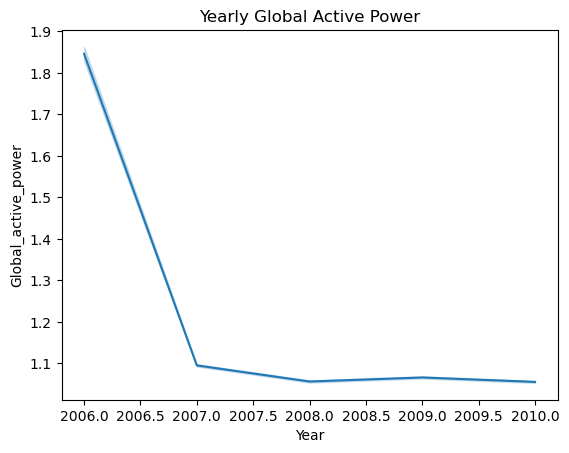

In [100]:
sns.lineplot(x='Year',y='Global_active_power',data=df1)
plt.title('Yearly Global Active Power')

Text(0.5, 1.0, 'Yearly Global Active Power')

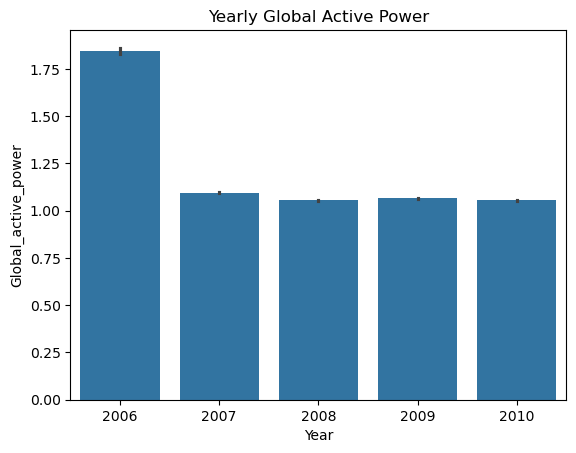

In [101]:
sns.barplot(x='Year',y='Global_active_power',data=df1)
plt.title('Yearly Global Active Power')

#### Monthly change in global active power

Text(0.5, 1.0, 'Monthly Global Active Power')

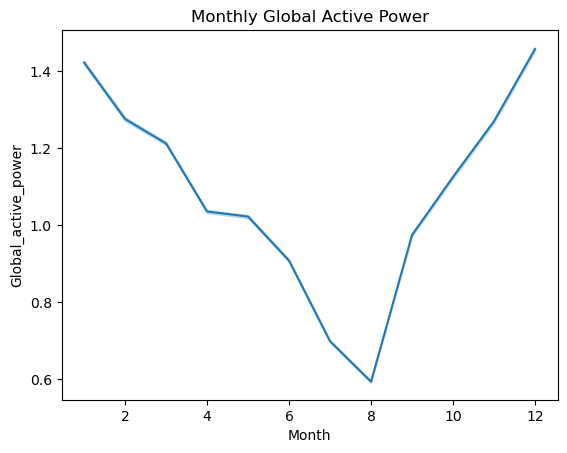

In [102]:
sns.lineplot(x='Month',y='Global_active_power',data=df1)
plt.title('Monthly Global Active Power')

Text(0.5, 1.0, 'Monthly Global Active Power')

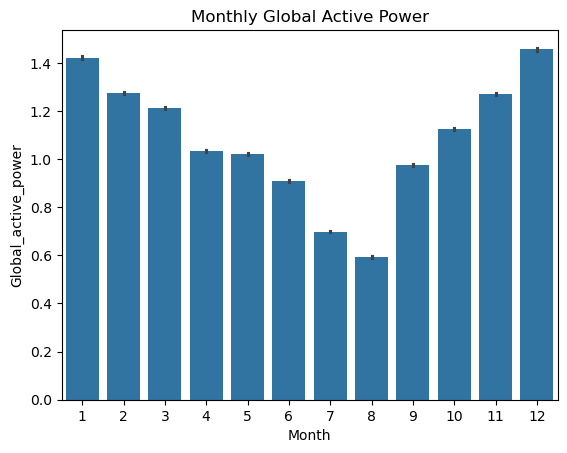

In [103]:
sns.barplot(x='Month',y='Global_active_power',data=df1)
plt.title('Monthly Global Active Power')

#### Daily change in global active power

Text(0.5, 1.0, 'Daily Global Active Power')

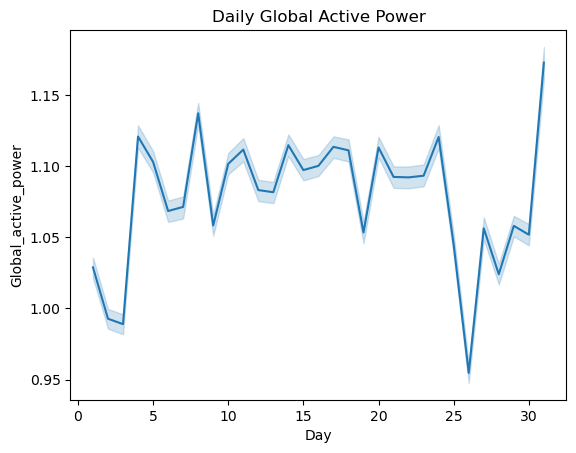

In [104]:
sns.lineplot(x='Day',y='Global_active_power',data=df1)
plt.title('Daily Global Active Power')

Text(0.5, 1.0, 'Daily Global Active Power')

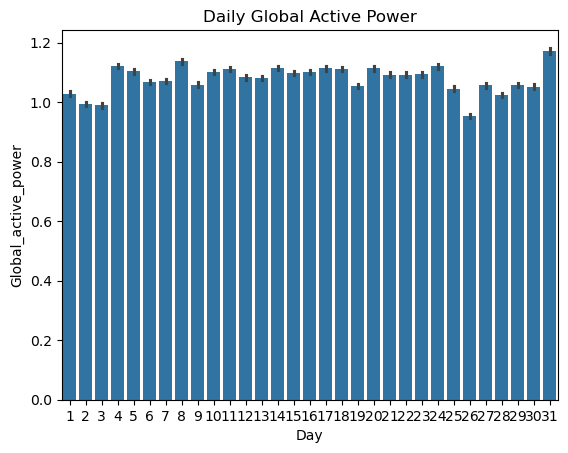

In [105]:
sns.barplot(x='Day',y='Global_active_power',data=df1)
plt.title('Daily Global Active Power')

#### To make training our machine learning models easier, we will use 'DateTime' as the index without splitting it into separate features like 'Year', 'Month', or 'Hour'.

In [106]:
df['DateTime']=pd.to_datetime(df['Date']+' '+df['Time'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 158.3+ MB


#### Now we drop the 'Date' and 'Time' column from **df**

In [108]:
df.drop(['Date','Time'],axis=1,inplace=True)

#### Again check for 'Date' and 'Time' columns are dropped from **df**

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988580 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 136.5 MB


## Correlation Matrix (Heatmap)
#### To check the relationship between **Features** and **Target** variables

Text(0.5, 1.0, 'Correlation Matrix')

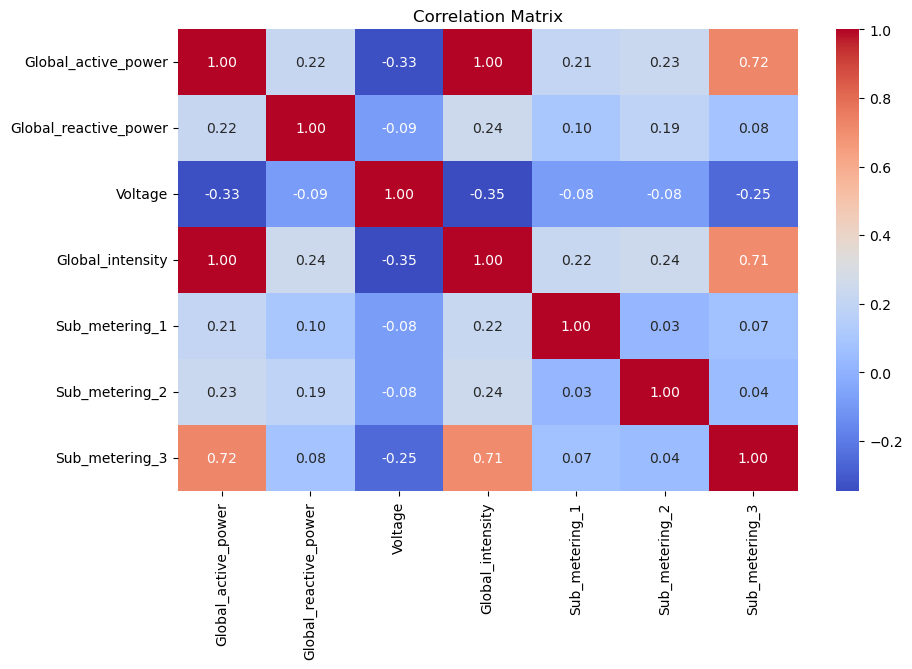

In [114]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(['DateTime'],axis=1).corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')

## Analysis from Correlation Matrix (Heatmap)
Based on the visualizations, it's evident that 'Voltage' has the weakest correlation with 'Global_active_power'. Therefore, we can safely drop it from our feature set, as it contributes minimally to predictive performance.

In [115]:
df.drop(['Voltage'],axis=1,inplace=True)

## Train and Test Split (80:20)

In [116]:
x=df.drop(['Global_active_power'],axis=1)
y=df['Global_active_power']

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Data preprocessing
#### **Scaling or normalization** are done after splitting the data into train and test sets. The reason for this to avoid any **data leakage**

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(1,2))
x_train=scaler.fit_transform(x_train.drop(['DateTime'],axis=1))
x_test=scaler.transform(x_test.drop(['DateTime'],axis=1))

## Machine Learning Models
### Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [124]:
y_pred=lrmodel.predict(x_test)

In [126]:
print(f'coefficient: {lrmodel.coef_}')
print(f'intercept: {lrmodel.intercept_}')

coefficient: [-0.22053698  6.3185165  -0.23974762 -0.05911202  0.06253706]
intercept: -5.8108635739118215


### Evaluation metrics for linear regression

In [127]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Squared Error: 0.0014988687825051956
Mean Absolute Error: 0.025347891523740288
R2 Score: 0.9979026931762488


In [130]:
df_result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_result.reset_index(drop=True,inplace=True)

In [131]:
df_result

,Actual,Predicted
0,3.646,3.667384
1,1.332,1.312436
2,0.392,0.395195
3,0.260,0.287244
4,0.382,0.394856
...,...,...
397711,0.488,0.506136
397712,0.418,0.398318
397713,0.304,0.273559
397714,0.392,0.366044


### Plotting Actual vs Predicted values to evaluate model performance


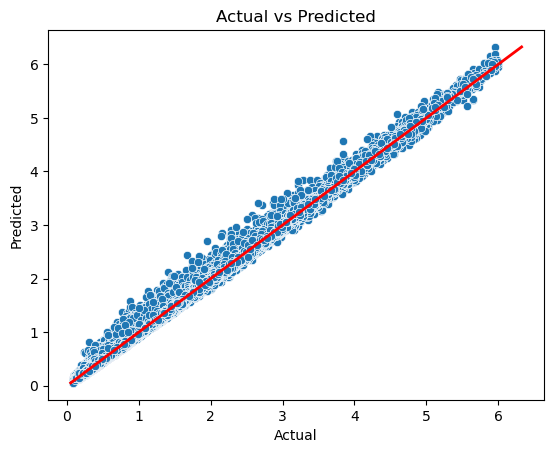

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Actual', y='Predicted', data=df_result)

max_val = max(df_result['Actual'].max(), df_result['Predicted'].max())
min_val = min(df_result['Actual'].min(), df_result['Predicted'].min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


### **Hyperparametric tuning** for Linear Regression using **GridSearchCV**

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(estimator=lrmodel, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [134]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

Best Parameters: {'fit_intercept': True, 'positive': False}
Best R² Score (CV): 0.9979022962734756


***without using hyperparametric tuning*** the R2_score: **0.9979**


***with using hyperparametric tuning*** the R2_score: **0.9979**

#### **So, there is no improvement in the optimization technique for this dataset because r2 score already attains the max value**

## Decision Tree Regressor

In [135]:
from sklearn.tree import DecisionTreeRegressor
dtmodel = DecisionTreeRegressor()
dtmodel.fit(x_train, y_train)


DecisionTreeRegressor()

In [136]:
y_pred = dtmodel.predict(x_test)

### Evaluation metrics for decision tree regressor

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.0014465537496466438
Mean Absolute Error: 0.021644088461191875
R2 Score: 0.9979758954983464


In [138]:
df_result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_result.reset_index(drop=True,inplace=True)

In [139]:
df_result

,Actual,Predicted
0,3.646,3.660000
1,1.332,1.317167
2,0.392,0.394628
3,0.260,0.259532
4,0.382,0.390332
...,...,...
397711,0.488,0.509689
397712,0.418,0.401322
397713,0.304,0.290918
397714,0.392,0.369353


### Plotting Actual vs Predicted values to evaluate model performance

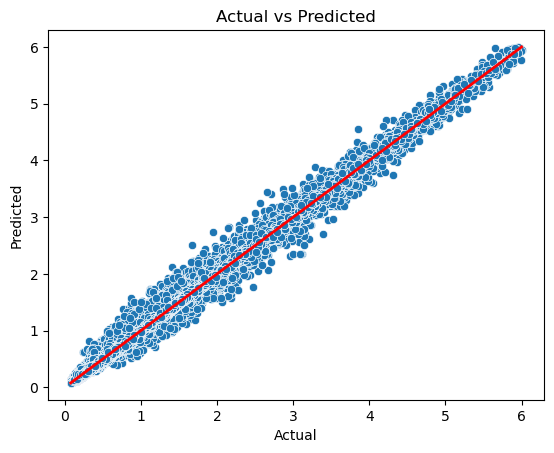

In [140]:
sns.scatterplot(x='Actual',y='Predicted',data=df_result)
val_max=max(df_result['Actual'].max(),df_result['Predicted'].max())
val_min=min(df_result['Actual'].min(),df_result['Predicted'].min())
plt.plot([val_min,val_max],[val_min,val_max],color='red',linestyle='-',linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

## Random Forest Regressor

In [141]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor(n_estimators=5)
rfmodel.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5)

In [142]:
y_pred=rfmodel.predict(x_test)

In [143]:
print("Test Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Test Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Test R² Score:", r2_score(y_test, y_pred))

Test Mean Squared Error: 0.0012656694832348476
Test Mean Absolute Error: 0.02093806770573178
Test R² Score: 0.9982289995796927


In [144]:
df_result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).reset_index(drop=True)
df_result

,Actual,Predicted
0,3.646,3.667813
1,1.332,1.316972
2,0.392,0.394088
3,0.260,0.259718
4,0.382,0.390522
...,...,...
397711,0.488,0.509435
397712,0.418,0.401466
397713,0.304,0.291728
397714,0.392,0.369456


### Plotting Actual vs Predicted values to evaluate model performance

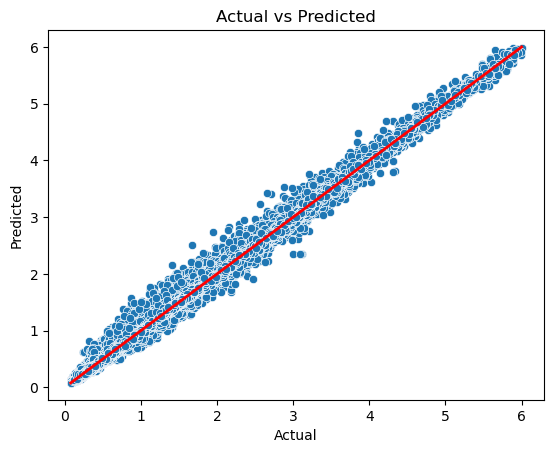

In [145]:
sns.scatterplot(x='Actual',y='Predicted',data=df_result)

val_max=max(df_result['Actual'].max(),df_result['Predicted'].max())
val_min=min(df_result['Actual'].min(),df_result['Predicted'].min())
plt.plot([val_min,val_max],[val_min,val_max],color='red',linestyle='-',linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

## Feature importance

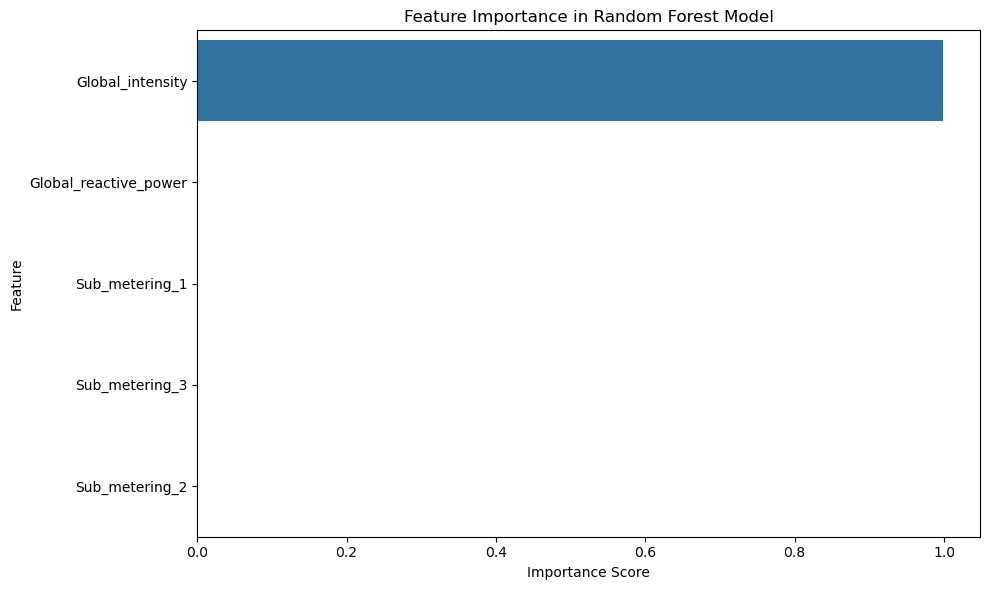

In [147]:
features = ['Global_reactive_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

importances = rfmodel.feature_importances_

feature_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

**R2 Score** from the above machine learning models (**Regressor**):
      
 Linear Regression : **0.9980**

Decision Tree Regressor : **0.9979**

Random Forest Regressor : **0.9982**

#### The **R2 score** of the above models are **mostly equivalent** but the best model for this dataset is **Random Forest Regressor**